In [1]:
from image_segmentation.model import image_segmentation
from edge_detection.teed.model import edge_detection
from edge_smoothing.model import edge_smoothing
from convert_svg.model import convert_svg
from edge_detection.canny.model import edge_detection as canny_edge
import cv2

# Load
image_path = '../public/bear_fishing.jpg'
with open(image_path, 'rb') as f:
    image_bytes = f.read()

# Hardcoded for now
tl = (1142, 134)  # Top-left corner of the image (adjust based on your image)
br = (1739, 1064)  # Bottom-right corner of the image (adjust based on your image)


In [2]:

segmented_image = image_segmentation(
    image_bytes, tl, br, "image_segmentation/sam_vit_h_4b8939.pth")

In [3]:

edged_image = edge_detection(image_bytes)

# Bytes to write to the new file
data = edged_image


# Open a new file in binary write mode
with open('../public/test.png', 'wb') as f:
    # Write the bytes to the file
    f.write(data)


['bear.png']: torch.Size([1, 3, 1080, 1920])
['image.png']: torch.Size([1, 3, 1080, 1920])


[[  8  12   0 ...  11  20   5]
 [ 12  10   0 ...   4  22   5]
 [  0   0   0 ...   0   0   0]
 ...
 [106 156  57 ... 166 146  47]
 [ 60 136  72 ...  81  51   8]
 [ 10  26  20 ...  12   3   3]]


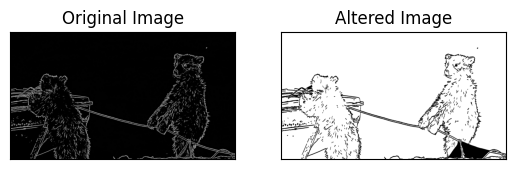

In [4]:

img = cv2.imread('../public/test.png', 0)

smoothed_image = edge_smoothing(data)

In [14]:

svg = convert_svg(smoothed_image)

In [9]:

# Save
segmented_image_path = '../public/bear_fishing_output.svg'
with open(segmented_image_path, 'wb') as f:
    f.write(svg)